In [286]:
R.version

               _                           
platform       x86_64-conda_cos6-linux-gnu 
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [287]:
library("dplyr")
library("glue")
library("stringr")
library("rlist")
library("data.table")
library("readr")
library("stringi")
library("swat")

In [305]:
source("UtilsRCAS.R")

# Connection a l'environnement SAS Viya

In [289]:
cashost <- '192.168.1.50'
casuser <- 'sasdemo'
caspwd <- 'Lprzwb31CA'
# cashost <- '35.241.219.145'
# casuser <- 'sebastien'
# caspwd <- 'Sebastien2020'

conn <- swat::CAS(cashost, 5570, username=casuser, password=caspwd)
# Activate metric tracing and other session parameters
out <- cas.sessionProp.setSessOpt(conn, metrics=TRUE, timeout=1800, caslib='casuser')


NOTE: Connecting to CAS and generating CAS action functions for loaded
      action sets...
NOTE: To generate the functions with signatures (for tab completion), set 
      options(cas.gen.function.sig=TRUE).
NOTE: 'CASUSER(sasdemo)' is now the active caslib.
NOTE: L'action 'sessionProp.setSessOpt' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,019300 secondes
NOTE:       temps UC                0,017687 secondes (91,64 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 362,78 Ko (0,00 %)


In [290]:
actionsets <- c('sampling', 'fedsql','percentile')
for(i in actionsets){
    loadActionSet(conn, i)
}

NOTE: Executing action 'builtins.loadActionSet'.
NOTE: Added action set 'sampling'.
NOTE: L'action 'builtins.loadActionSet' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,004671 secondes
NOTE:       temps UC                0,004245 secondes (90,88 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 235,78 Ko (0,00 %)
NOTE: Executing action 'builtins.actionSetInfo'.
NOTE: L'action 'builtins.actionSetInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,003968 secondes
NOTE:       temps UC                0,003541 secondes (89,24 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 318,28 Ko (0,00 %)
NOTE: Executing action 'builtins.listActions'.
NOTE: Informations pour l'ensemble d'actions 'sampling':
NOTE:    sampling
NOTE:       srs -  Samples a proportion of data from th

In [291]:
cas.builtins.serverStatus(conn)

NOTE: Executing action 'builtins.serverStatus'.
NOTE: Grid node action status report: 1 nodes, 37 total actions executed.
NOTE: L'action 'builtins.serverStatus' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,002368 secondes
NOTE:       temps UC                0,002119 secondes (89,48 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 334,66 Ko (0,00 %)


$About
$About$CAS
[1] "Cloud Analytic Services"

$About$Version
[1] "3.05"

$About$VersionLong
[1] "V.03.05M0P11062019"

$About$Copyright
[1] "Copyright © 2014-2018 SAS Institute Inc. All Rights Reserved."

$About$ServerTime
[1] "2020-04-17T21:29:34Z"

$About$System
$About$System$Hostname
[1] "viya35.local.fr"

$About$System$`OS Name`
[1] "Linux"

$About$System$`OS Family`
[1] "LIN X64"

$About$System$`OS Release`
[1] "3.10.0-1062.el7.x86_64"

$About$System$`OS Version`
[1] "#1 SMP Wed Aug 7 18:08:02 UTC 2019"

$About$System$`Model Number`
[1] "x86_64"

$About$System$`Linux Distribution`
[1] "CentOS Linux release 7.6.1810 (Core)"


$About$license
$About$license$site
[1] "SAS_VIYA_DATASCIENCE"

$About$license$siteNum
[1] 70180938

$About$license$expires
[1] "19 février 2021 00 h 00"

$About$license$gracePeriod
[1] 45

$About$license$warningPeriod
[1] 45

$About$license$maxCPUs
[1] 9999



$server
  nodes actions
1     1      37

$nodestatus
             name       role uptime running stalled
1 viya35.local.fr controller 16,578       0       0

## Defini une librairie CAS pointant sur le repertoire contenant tous les fichiers CSV en entree. On definie la source en DNFS, cela signifie que la lecture et l'ecriture des fichiers se fera en multitheading et multi noeud automatiquement. Les formats de fichiers supportes actuellement sur ce mode sont : CSV, PARQUET et SASHDAT.

In [292]:
cas.table.addCaslib(conn,name="mycaslib", path="/data/data/BDF_SMALL_DB", dataSource={srcType="dnfs"})
out <- cas.sessionProp.setSessOpt(conn,caslib='casuser')

NOTE: Executing action 'table.addCaslib'.
NOTE: 'mycaslib' is now the active caslib.
NOTE: Cloud Analytic Services added the caslib 'mycaslib'.
NOTE: L'action 'table.addCaslib' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001979 secondes
NOTE:       temps UC                0,001699 secondes (85,85 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 759,03 Ko (0,00 %)


Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
mycaslib,DNFS,,/data/data/BDF_SMALL_DB/,,0,1,1,0,0,0


NOTE: Executing action 'sessionProp.setSessOpt'.
NOTE: 'CASUSER(sasdemo)' is now the active caslib.
NOTE: L'action 'sessionProp.setSessOpt' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000924 secondes
NOTE:       temps UC                0,000699 secondes (75,65 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 283,50 Ko (0,00 %)


# Chargement en memoire de tous les fichiers CSV en entree (referentiel et agregats) pour l'utilisation ulterieure.

In [293]:
import_all_csv_in_memory(conn, 'mycaslib','casuser')

NOTE: Executing action 'table.fileInfo'.
NOTE: L'action 'table.fileInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,010748 secondes
NOTE:       temps UC                0,009747 secondes (90,69 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 724,63 Ko (0,00 %)


[1] "D1"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001834 secondes
NOTE:       temps UC                0,001269 secondes (69,19 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file D1.csv available as table D1 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,664763 secondes
NOTE:       temps UC                3,895599 secondes (586,01 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 165,61 Mo (0,52 %)


[1] "D2"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001380 secondes
NOTE:       temps UC                0,000623 secondes (45,14 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file D2.csv available as table D2 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,300356 secondes
NOTE:       temps UC                1,100956 secondes (366,55 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 148,14 Mo (0,46 %)


[1] "D3"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000890 secondes
NOTE:       temps UC                0,000594 secondes (66,74 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file D3.csv available as table D3 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,472995 secondes
NOTE:       temps UC                2,729680 secondes (577,11 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 164,00 Mo (0,51 %)


[1] "D"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001114 secondes
NOTE:       temps UC                0,000652 secondes (58,53 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file D.csv available as table D in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,676963 secondes
NOTE:       temps UC                4,096022 secondes (605,06 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 174,48 Mo (0,55 %)


[1] "F"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001535 secondes
NOTE:       temps UC                0,001183 secondes (77,07 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file F.csv available as table F in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,170801 secondes
NOTE:       temps UC                0,157154 secondes (92,01 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 131,27 Mo (0,41 %)


[1] "O"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001736 secondes
NOTE:       temps UC                0,001365 secondes (78,63 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 301,94 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file O.csv available as table O in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,776626 secondes
NOTE:       temps UC                4,535487 secondes (584,00 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 168,62 Mo (0,53 %)


[1] "P"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000699 secondes
NOTE:       temps UC                0,000486 secondes (69,53 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file P.csv available as table P in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,302288 secondes
NOTE:       temps UC                1,598718 secondes (528,87 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 156,48 Mo (0,49 %)


[1] "U1"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001794 secondes
NOTE:       temps UC                0,001420 secondes (79,15 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file U1.csv available as table U1 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,425544 secondes
NOTE:       temps UC                2,449676 secondes (575,66 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 161,33 Mo (0,50 %)


[1] "U2"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001773 secondes
NOTE:       temps UC                0,001159 secondes (65,37 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file U2.csv available as table U2 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,433693 secondes
NOTE:       temps UC                2,227685 secondes (513,65 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 161,43 Mo (0,50 %)


[1] "U3"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000806 secondes
NOTE:       temps UC                0,000471 secondes (58,44 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file U3.csv available as table U3 in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,239844 secondes
NOTE:       temps UC                0,880050 secondes (366,93 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 147,03 Mo (0,46 %)


[1] "Z"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000666 secondes
NOTE:       temps UC                0,000512 secondes (76,88 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file Z.csv available as table Z in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,219675 secondes
NOTE:       temps UC                0,817578 secondes (372,18 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 148,14 Mo (0,46 %)


[1] "TablePaysZone"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000770 secondes
NOTE:       temps UC                0,000598 secondes (77,66 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 301,94 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file TablePaysZone.csv available as table TABLEPAYSZONE in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,081532 secondes
NOTE:       temps UC                0,075297 secondes (92,35 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 129,52 Mo (0,40 %)


[1] "PlanAgregation"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001693 secondes
NOTE:       temps UC                0,001317 secondes (77,79 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 301,94 Ko (0,00 %)
NOTE: Executing action 'table.loadTable'.
NOTE: Cloud Analytic Services made the DNFS file PlanAgregation.csv available as table PLANAGREGATION in caslib CASUSER(sasdemo).
NOTE: L'action 'table.loadTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,065805 secondes
NOTE:       temps UC                0,060334 secondes (91,69 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 129,72 Mo (0,41 %)


In [307]:
cas.table.tableInfo(conn,caslib="casuser")

NOTE: Executing action 'table.tableInfo'.
NOTE: L'action 'table.tableInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,003663 secondes
NOTE:       temps UC                0,002934 secondes (80,10 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 726,41 Ko (0,00 %)


Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
D1,216482,8,0,utf-8,2020-04-17T23:30:44+02:00,2020-04-17T23:30:44+02:00,2020-04-17T23:33:42+02:00,UTF8,1902778244,...,0,0,0,D1.csv,mycaslib,0,sasdemo,,2020-04-06T15:46:33+02:00,1901799993
D2,64725,8,0,utf-8,2020-04-17T23:30:45+02:00,2020-04-17T23:30:45+02:00,2020-04-17T23:33:42+02:00,UTF8,1902778245,...,0,0,0,D2.csv,mycaslib,0,sasdemo,,2020-04-06T15:46:51+02:00,1901800011
D3,181969,8,0,utf-8,2020-04-17T23:30:45+02:00,2020-04-17T23:30:45+02:00,2020-04-17T23:33:43+02:00,UTF8,1902778245,...,0,0,0,D3.csv,mycaslib,0,sasdemo,,2020-04-06T15:47:37+02:00,1901800057
D,320389,8,0,utf-8,2020-04-17T23:30:46+02:00,2020-04-17T23:30:46+02:00,2020-04-17T23:33:43+02:00,UTF8,1902778246,...,0,0,0,D.csv,mycaslib,0,sasdemo,,2020-04-06T15:49:03+02:00,1901800143
F,5974,8,0,utf-8,2020-04-17T23:30:47+02:00,2020-04-17T23:30:47+02:00,2020-04-17T23:33:43+02:00,UTF8,1902778247,...,0,0,0,F.csv,mycaslib,0,sasdemo,,2020-04-06T15:49:06+02:00,1901800146
O,283449,8,0,utf-8,2020-04-17T23:30:47+02:00,2020-04-17T23:30:47+02:00,2020-04-17T23:33:44+02:00,UTF8,1902778247,...,0,0,0,O.csv,mycaslib,0,sasdemo,,2020-04-06T15:50:16+02:00,1901800216
P,95308,8,0,utf-8,2020-04-17T23:30:48+02:00,2020-04-17T23:30:48+02:00,2020-04-17T23:33:44+02:00,UTF8,1902778248,...,0,0,0,P.csv,mycaslib,0,sasdemo,,2020-04-06T15:50:38+02:00,1901800238
U1,148350,8,0,utf-8,2020-04-17T23:30:49+02:00,2020-04-17T23:30:49+02:00,2020-04-17T23:33:44+02:00,UTF8,1902778249,...,0,0,0,U1.csv,mycaslib,0,sasdemo,,2020-04-06T15:51:17+02:00,1901800277
U2,133907,8,0,utf-8,2020-04-17T23:30:49+02:00,2020-04-17T23:30:49+02:00,2020-04-17T23:33:44+02:00,UTF8,1902778249,...,0,0,0,U2.csv,mycaslib,0,sasdemo,,2020-04-06T15:51:52+02:00,1901800312
U3,60779,8,0,utf-8,2020-04-17T23:30:50+02:00,2020-04-17T23:30:50+02:00,2020-04-17T23:33:45+02:00,UTF8,1902778250,...,0,0,0,U3.csv,mycaslib,0,sasdemo,,2020-04-06T15:52:09+02:00,1901800329


In [ ]:
#tablepayszone <- defCasTable(conn, tablename='TABLEPAYSZONE', caslib='casuser')
# Test simple de filtrage d'une table CAS
#t2 <- tablepayszone[(tablepayszone$code_pays!='1A') | (tablepayszone$code_pays=='1B'),'code_pays']
#names(tablepayszone)
# La table t2 est une vue CAS executee au moment de la demande sur le serveur CAS
#attributes(t2)
#head(t2)
#nrow(tablepayszone)

## Concatenation totale de toutes les tables d'agregat en mémoire pour former une table nommee AGGTTECATEGORIE

In [295]:
#cas.table.tableInfo(conn,caslib='casuser')$TableInfo[,c('Name','Rows')]
cas_concat_all_tables(conn, "casuser","casuser","AGGTTECATEGORIE")
table_AggregationMensuelleTouteCategorie <- defCasTable(conn, tablename='AGGTTECATEGORIE', caslib='casuser')
nrow(table_AggregationMensuelleTouteCategorie)

NOTE: Executing action 'table.tableInfo'.
NOTE: L'action 'table.tableInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,002982 secondes
NOTE:       temps UC                0,002584 secondes (86,65 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 733,25 Ko (0,00 %)
NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001855 secondes
NOTE:       temps UC                0,001289 secondes (69,49 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 299,41 Ko (0,00 %)
NOTE: Executing action 'dataStep.runCode'.
NOTE: L'action 'dataStep.runCode' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,197585 secondes
NOTE:       temps UC                0,965543 secondes (488,67 %)
NOTE: 

[1] 1576201

In [ ]:

sauvegarder_cas_table(conn, 'casuser', 'CONCAT_TAB', 'casuser','concat_tab.parquet')

# Exemples d'utilisation des fonctions de base R profitant du moteur in-memory CAS

cas.table.loadTable(conn, casout=list(caslib='casuser',name='CONCAT_TAB_PARQUET'), caslib='casuser', path='concat_tab.parquet')
concat_tab_parquet <- defCasTable(conn, tablename='concat_tab_parquet', caslib = 'casuser')

cas.table.loadTable(conn, casout=list(caslib='casuser',name='CONCAT_TAB_PARQUET'), caslib='casuser', path='concat_tab.parquet')

summary(concat_tab_parquet)
nrow(concat_tab_parquet)
names(concat_tab_parquet)

# Transfert CAS table and convert it to R data frame

concat_tab_dt <- to.casDataFrame(concat_tab_parquet,obs=10000000)

dim(concat_tab_dt)

## Produire la repartition en nombre d'enregistrements par categorie a partir de l'agregation faite en memoire par le moteur CAS sur la table globale AGGTTECATEGORIE et la recuperation de ces agregat en entree de la fonction PIE de R

NOTE: Executing action 'simple.freq'.
NOTE: L'action 'simple.freq' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,234174 secondes
NOTE:       temps UC                1,343290 secondes (573,63 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 3,92 Mo (0,01 %)


casLib,Name,Rows,Columns
CASUSER(sasdemo),AGGTTECATEGORIE_freq,11,5


NOTE: Executing action 'table.fetch'.
NOTE: L'action 'table.fetch' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,007276 secondes
NOTE:       temps UC                0,006586 secondes (90,52 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 2,15 Mo (0,01 %)


$Fetch
   _Index_  _Column_ _Charvar_ _Fmtvar_ _Level_ _Frequency_
1        1 tablename         D        D       7      320389
2        2 tablename         O        O       5      283449
3        3 tablename        D1       D1       9      216482
4        4 tablename        D3       D3       4      181969
5        5 tablename        U1       U1      11      148350
6        6 tablename        U2       U2       1      133907
7        7 tablename         P        P      10       95308
8        8 tablename         Z        Z       3       64869
9        9 tablename        D2       D2       8       64725
10      10 tablename        U3       U3       2       60779
11      11 tablename         F        F       6        5974



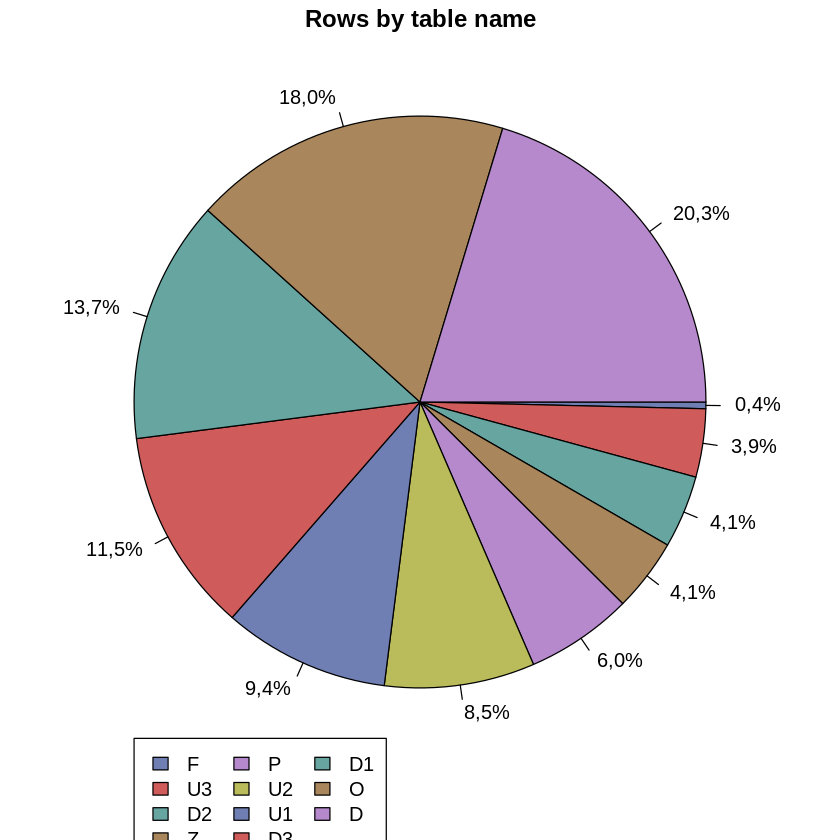

In [296]:
cas.simple.freq(conn, inputs = c("tablename"),table = c(name = "AGGTTECATEGORIE"),casout = c(name = "AGGTTECATEGORIE_freq", replace = TRUE)) 
res <- cas.table.fetch(conn, table = "AGGTTECATEGORIE_freq", sortBy = list(list(name = "_Frequency_",order = "descending")))
print(res)
piedata <- res$Fetch                                              # 
names(piedata) <- gsub("_", "", names(piedata))
piedata <- piedata[order(piedata$Frequency),]
total <- sum(piedata$Frequency)
piedata$Percent <- scales::percent(piedata$Frequency / total)
fillcolors = c("#6F7EB3", "#D05B5B", "#66A5A0", "#A9865B","#B689CD", "#BABC5C")
par(mar = c(3, 0, 1.5, 0), xpd=TRUE)
pie(piedata$Frequency,labels = piedata$Percent, col=fillcolors, radius=0.85, clockwise=TRUE, init.angle=0, main="Rows by table name")
legend(x=-0.85, y=-1, horiz = FALSE, piedata$Charvar, fill = fillcolors, ncol=3)

## Declaration des table CAS en tant qu'objet de type CASTable en R

In [297]:
table_pays_zone <- defCasTable(conn, tablename='TABLEPAYSZONE', caslib='casuser')
table_planAggregation <- defCasTable(conn, tablename='PLANAGREGATION', caslib='casuser')
head(table_pays_zone)
head(table_planAggregation)

NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,002097 secondes
NOTE:       temps UC                0,001765 secondes (84,17 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 851,25 Ko (0,00 %)
NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001954 secondes
NOTE:       temps UC                0,001669 secondes (85,41 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 861,81 Ko (0,00 %)
NOTE: Executing action 'table.fetch'.
NOTE: L'action 'table.fetch' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,003249 secondes
NOTE:       temps UC                0,002941 secondes (90,52 %)
NOTE:       t

code_pays,libelle,code_zone,Niveau,regle
1A,International organisations,1A,1,
1B,UN organisations,1B,1,
1C,IMF (International Monetary Fund),1A,2,
1C,IMF (International Monetary Fund),1B,2,
1C,IMF (International Monetary Fund),9A,2,
1C,IMF (International Monetary Fund),D4,2,


NOTE: Executing action 'table.fetch'.
NOTE: L'action 'table.fetch' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,009709 secondes
NOTE:       temps UC                0,008754 secondes (90,16 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 1,21 Mo (0,00 %)


code_sortie,code_entree_1,formule_1,code_entree_2,formule_2,code_entree_3,formule_3,code_entree_4,formule_4,code_entree_5,...,code_entree_16,formule_16,code_entree_17,formule_17,code_entree_18,formule_18,code_entree_19,formule_19,code_entree_20,formule_20
_Z.N.FR.W1.S1.S1.T.B.D4P._T.F.T.EUR._T._Z.C._Z._Z._T.A,_Z.N.FR.W1.S1.S1.T.B.D4P.D.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S1.S1.T.B.D4P.P.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S1.S1.T.B.D4P.O.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S1._Z.T.B.D4P.R.F.T.EUR._T._Z.C._Z._Z._T.A,1,,...,,,,,,,,,,
_Z.N.FR._Z.S1.S1.T.C.D4P._T.F.T.EUR._T._Z.C._Z._Z._T.A,_Z.N.FR._Z.S1.S1.T.C.D4P.D.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR._Z.S1.S1.T.C.D4P.P.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR._Z.S1.S1.T.C.D4P.O.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR._Z.S1._Z.T.C.D4P.R.F.T.EUR._T._Z.C._Z._Z._T.A,1,,...,,,,,,,,,,
_Z.N.FR.W1.S1.S1.T.D.D4P._T.F.T.EUR._T._Z.C._Z._Z._T.A,_Z.N.FR.W1.S1.S1.T.D.D4P.D.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S1.S1.T.D.D4P.P.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S1.S1.T.D.D4P.O.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S1._Z.T.D.D4P.R.F.T.EUR._T._Z.C._Z._Z._T.A,1,,...,,,,,,,,,,
_Z.N.FR.W1.S121.S1.T.B.D4P._T.F.T.EUR._T._Z.C._Z._Z._T.A,_Z.N.FR.W1.S121.S1.T.B.D4P.D.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S121.S1.T.B.D4P.P.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S121.S1.T.B.D4P.O.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S121._Z.T.B.D4P.R.F.T.EUR._T._Z.C._Z._Z._T.A,1,,...,,,,,,,,,,
_Z.N.FR._Z.S121.S1.T.C.D4P._T.F.T.EUR._T._Z.C._Z._Z._T.A,_Z.N.FR._Z.S121.S1.T.C.D4P.D.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR._Z.S121.S1.T.C.D4P.P.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR._Z.S121.S1.T.C.D4P.O.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR._Z.S121._Z.T.C.D4P.R.F.T.EUR._T._Z.C._Z._Z._T.A,1,,...,,,,,,,,,,
_Z.N.FR.W1.S121.S1.T.D.D4P._T.F.T.EUR._T._Z.C._Z._Z._T.A,_Z.N.FR.W1.S121.S1.T.D.D4P.D.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S121.S1.T.D.D4P.P.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S121.S1.T.D.D4P.O.F.T.EUR._T._Z.C._Z._Z._T.A,1,_Z.N.FR.W1.S121._Z.T.D.D4P.R.F.T.EUR._T._Z.C._Z._Z._T.A,1,,...,,,,,,,,,,


# Code principal basé sur le programme R existant

## Fonction de traitement principal

In [302]:
traitement_principal <- function(freq, RevFin, PeriodeFin, planAggregation,ReferencePiZones, Repertoire, ConnectionSecureDB)
{
  Frequence <- freq
  HeureDebut <- Sys.time()
  An = as.numeric(ExtractString(PeriodeFin, 1, 4))
  print("ETAPE DATA: LECTURE TABLE PI_ZONE")
  print(Sys.time())
  TablePiZone <- recuperation_traitement_table_code_pays(ReferencePiZones, ConnectionSecureDB)
  #return(TablePiZone)
  print(" TAILLE TABLE TablePaysZone")
  print(dim(TablePiZone))
  print(Sys.time())
  print("LECTURE ET MISE EN FORME DES FICHIERS D'AGGREGATION CODE SERIE")
  print(Sys.time())
  # planAggregation <- "PlanAggregation.csv"
  planAgregationCodeSerie <- lecture_fichier_aggregation_codeSerie(planAggregation, connectionSecureDB)
  # # write_delim(planAgregationCodeSerie, "planAgregationCodeSerie.csv", delim=";")
  print(" TAILLE TABLE planAgregationCodeSerie")
  print(dim(planAgregationCodeSerie))
  print(Sys.time())
  print("JOINTURE PLAN D'AGGREGATION")
  PlanAggregationParametre <- parametrage_aggregation_code_serie(planAgregationCodeSerie, TablePiZone, freq)
  # # write_delim(PlanAggregationParametre, "PlanAggregationParametre.csv", delim=";")
  print("Taille plan d'agregation")
  print(dim(PlanAggregationParametre))

  # Ecriture du dataframe de sortie en table CAS pour les futures jointures
  PlanAggregationParametreCAS <- as.casTable(conn, PlanAggregationParametre,'PLANAGGPARAM')
  print(dim(PlanAggregationParametreCAS))
    
  print("ESTIMATION NOMBRE DE PERIODE ET DE DEBUT DE TRAITEMENT")
  result_nbperiode_moisdebut <- detection_nbPeriode_moisDebut(freq, RevFin, PeriodeFin)
  NbrePeriode <- result_nbperiode_moisdebut$nbper
  MoisDebut <- as.numeric(result_nbperiode_moisdebut$moisDebut)
  print(MoisDebut)
  
  rm(result_nbperiode_moisdebut)
  
  print("BOUCLE DU LES MOIS")

 # On supprime la table d'agregat finale si elle existe avant de la reconstruire de la boucle mensuelle suivante   
 cas.table.dropTable(conn, caslib='casuser', name='AGG_FINALE', quiet=TRUE)
    
  for(mois in MoisDebut:(MoisDebut+NbrePeriode-1))
  {
     print(paste0("     Mois debut ", MoisDebut))
     print(paste0("     Mois fin ", (MoisDebut+NbrePeriode-1)))
     print(paste0("     Mois en cours de traitement: ", mois))
     
     print(Sys.time())
     
     print("                      lecture")

     AggregationMensuelleTouteCategorie <- lecture_tables_aggregation(freq, Mois, RevFin, PeriodeFin, Repertoire, ConnectionSecureDB,'AGGTTECATEGORIE','AGG_MENS_TEMP')
     print("Taille table d'agregation")
     print(dim(AggregationMensuelleTouteCategorie))
     print(names(AggregationMensuelleTouteCategorie))
      
     TableIdMixte <- lecture_tables_mixte(freq, Mois, RevFin, PeriodeFin, Repertoire, ConnectionSecureDB,'AGGTTECATEGORIE','AGG_MIXTE')
     print(dim(TableIdMixte))
     print(names(TableIdMixte))
     print(Sys.time())
     
     print("PARAMETRAGE CODE SERIE") 
     
     print("APPLICATION PARAMETRAGE CODE SERIE") 
     
     AggregationCodeSerieFinaleMensuelle <- application_plan_parametrage_aggregation_code_serie_mensuel('AGG_MENS_TEMP', 'PLANAGGPARAM', ConnectionSecureDB,'AGG_MENS')
     print(names(AggregationCodeSerieFinaleMensuelle))
      
     # On ajoute la table mensuelle à la table globale finale
     cas_append2tables(conn, 'casuser', 'AGG_MENS', 'casuser', 'AGG_FINALE')
  }
  
  #   
  #   # Use write_delim to compare it to pandas
  #   # write_delim(AggregationCodeSerieFinaleMensuelle,"AggregationCodeSerieFinaleMensuelle.csv", delim=";")
  #   
  #   print("Taille AggregationCodeSerieFinaleMensuelle")
  #   print(dim(AggregationCodeSerieFinaleMensuelle))
  #   print(Sys.time())
  #   print("SAUVEGARDE DE LA TABLE SORTIE FINALE") 
  #   TableASauvegarder <-
  #     sauvegarde_donnees_par_categorie_fonctionnelle_et_par_aggregation_code_serie(
  #       AggregationCodeSerieFinaleMensuelle,
  #       AggregationMensuelleTouteCategorie,
  #       TableIdMixte, Freq, Mois, RevFin, An)
  #   
  #   print("FIN DE LA SAUVEGARDE DE LA TABLE SORTIE FINALE")
  #   print(Sys.time())
  #   print("DEBUT DE L'ECRITURE")
  #   
  #   # Use write_delim to compare it to pandas
  #   write_delim(TableASauvegarder, 'TableASauvegarder.csv', delim=";")
  #   
  #   print("Fin ecriture table finale")
  #   print(Sys.time())
  #   
  #   print(summary(TableASauvegarder))
  #   
  #   return(TableASauvegarder)
}

## Test

In [306]:
Repertoire <- "AC156203"
RevFin<- "SD10"
PeriodeFin <- "2018Q4"
freq <- "Q"
planAggregation <- table_planAggregation
ReferencePiZones <- table_pays_zone
ConnectionSecureDB <- conn # Connexion securisee a la session CAS

HeureDebut <- Sys.time()

TableASauvegarder <- traitement_principal(freq, RevFin, PeriodeFin, planAggregation,ReferencePiZones, Repertoire, ConnectionSecureDB)

Duree <- Sys.time() - HeureDebut

print(Duree)

[1] "ETAPE DATA: LECTURE TABLE PI_ZONE"
[1] "2020-04-18 00:41:00 CEST"
[1] "recuperation_traitement_table_code_pays monostream"
[1] "2020-04-18 00:41:00 CEST"


NOTE: Executing action 'table.fetch'.
NOTE: L'action 'table.fetch' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,242497 secondes
NOTE:       temps UC                0,223621 secondes (92,22 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 1,46 Mo (0,00 %)
Column 1 ['code_zone'] of item 2 is missing in item 1. Use fill=TRUE to fill with NA (NULL for list columns), or use.names=FALSE to ignore column names. use.names='check' (default from v1.12.2) emits this message and proceeds as if use.names=FALSE for  backwards compatibility. See news item 5 in v1.12.2 for options to control this message.


[1] "end recuperation_traitement_table_code_pays monostream"
[1] "2020-04-18 00:41:13 CEST"
[1] " TAILLE TABLE TablePaysZone"
[1] 445   3
[1] "2020-04-18 00:41:13 CEST"
[1] "LECTURE ET MISE EN FORME DES FICHIERS D'AGGREGATION CODE SERIE"
[1] "2020-04-18 00:41:13 CEST"
[1] "lecture_fichier_aggregation_codeSerie monostream"


NOTE: Executing action 'table.fetch'.
NOTE: L'action 'table.fetch' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,048210 secondes
NOTE:       temps UC                0,042483 secondes (88,12 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 1,21 Mo (0,00 %)


[1] " TAILLE TABLE planAgregationCodeSerie"
[1] 2697    3
[1] "2020-04-18 00:41:23 CEST"
[1] "JOINTURE PLAN D'AGGREGATION"
[1] "parametrage_aggregation_code_serie monostream"
[1] "2020-04-18 00:41:23 CEST"
[1] "Recuperation des positions et longueur parents dans les codes"
[1] "Recuperation des positions et longueur des parametres dans les codes"
[1] "2020-04-18 00:41:26 CEST"
[1] "Recuperation des positions et longueur des index dans les codes"
[1] "2020-04-18 00:41:27 CEST"
[1] "10 GB"
[1] "Creation des variables cd2_, cd3_, cd1_, refsec, countsec par decoupage des codes"
[1] "2020-04-18 00:41:28 CEST"
[1] "Modification conditionnelle des valeurs de code entree et code sortie"
[1] "2020-04-18 00:41:28 CEST"
[1] "Jointure de la table AggregationTable TablePiZone"
[1] 7125   20
 [1] "code_sortie"       "code_entree"       "formule"          
 [4] "enfants"           "parents"           "cle"              
 [7] "ind_"              "PositionEnfant"    "LongueurEnfant"   
[10] "PositionPa

Warning message in if (class(data) == "character") {:
“la condition a une longueur > 1 et seul le premier élément est utilisé”NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,003376 secondes
NOTE:       temps UC                0,002938 secondes (87,03 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 845,06 Ko (0,00 %)
NOTE: Executing action 'simple.numRows'.
NOTE: L'action 'simple.numRows' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001095 secondes
NOTE:       temps UC                0,000878 secondes (80,18 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 433,53 Ko (0,00 %)


[1] 2639427       3
[1] "ESTIMATION NOMBRE DE PERIODE ET DE DEBUT DE TRAITEMENT"
[1] "detection_nbPeriode_moisDebut monostream"
[1] 201812
[1] "BOUCLE DU LES MOIS"


NOTE: Executing action 'table.dropTable'.
NOTE: L'action 'table.dropTable' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,000929 secondes
NOTE:       temps UC                0,000570 secondes (61,36 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 300,38 Ko (0,00 %)


[1] "     Mois debut 201812"
[1] "     Mois fin 201812"
[1] "     Mois en cours de traitement: 201812"
[1] "2020-04-18 00:43:25 CEST"
[1] "                      lecture"
[1] "lecture_tables_aggregation monostream"
[1] "2020-04-18 00:43:25 CEST"
[1] "10 GB"
[1] "CHARGEMENT DES TABLES D'AGGREGATION, monostream"
[1] "2020-04-18 00:43:25 CEST"
[1] "TABLES AGREGATION LU DE LA TABLE CAS AGGTTECATEGORIE"


NOTE: Executing action 'fedSql.execDirect'.
NOTE: Table AGG_MENS_TEMP was created in caslib CASUSER(sasdemo) with 1576201 rows returned.
NOTE: L'action 'fedSql.execDirect' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              1,924185 secondes
NOTE:       temps UC                11,921108 secondes (619,54 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 34,86 Mo (0,11 %)


[1] "end lecture_tables_aggregation monostream"
[1] "2020-04-18 00:43:27 CEST"


NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001449 secondes
NOTE:       temps UC                0,001216 secondes (83,92 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 845,38 Ko (0,00 %)


[1] "Taille table d'agregation"


NOTE: Executing action 'simple.numRows'.
NOTE: L'action 'simple.numRows' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001236 secondes
NOTE:       temps UC                0,001066 secondes (86,25 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 456,91 Ko (0,00 %)


[1] 1576201       9
[1] "code"         "montant"      "OBS_STATUS"   "CONF_STATUS"  "Periode_deb" 
[6] "revision_deb" "Periode_fin"  "revision_fin" "tablename"   
[1] "lecture_tables_mixte monostream"
[1] "2020-04-18 00:43:28 CEST"
[1] "10 GB"
[1] "end lecture_tables_mixte monostream"
[1] "2020-04-18 00:43:28 CEST"
NULL
NULL
[1] "2020-04-18 00:43:28 CEST"
[1] "PARAMETRAGE CODE SERIE"
[1] "APPLICATION PARAMETRAGE CODE SERIE"
[1] "application_plan_parametrage_aggregation_code_serie_mensuel monostream"
[1] "2020-04-18 00:43:28 CEST"
[1] "2020-04-18 00:43:28 CEST"
[1] "Renomage de variables et traitement d'espace dans les chaines de caratere"
[1] "2020-04-18 00:43:28 CEST"
[1] "Preparation de la jointure des tables PlanAggregationParametre, AggregationMensuelleTouteCategorie"
[1] "2020-04-18 00:43:28 CEST"
[1] "Jointure des tables PlanAggregationParametre, AggregationMensuelleTouteCategorie"


NOTE: Executing action 'fedSql.execDirect'.
NOTE: Table TMP_AGG was created in caslib CASUSER(sasdemo) with 1578041 rows returned.
NOTE: L'action 'fedSql.execDirect' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              18,931371 secondes
NOTE:       temps UC                36,145754 secondes (190,93 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 886,70 Mo (2,77 %)


[1] "Taille de la jointure"
[1] "2020-04-18 00:43:47 CEST"
[1] "Calcul des montants ponderes cumules par code_sortie"


NOTE: Executing action 'fedSql.execDirect'.
NOTE: Table AGG_MENS was created in caslib CASUSER(sasdemo) with 8588 rows returned.
NOTE: L'action 'fedSql.execDirect' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              6,024321 secondes
NOTE:       temps UC                31,457656 secondes (522,18 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 80,15 Mo (0,25 %)
NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,003585 secondes
NOTE:       temps UC                0,003182 secondes (88,76 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 827,00 Ko (0,00 %)


[1] " TAILLE TABLE CalculAggregationCodeSerieMensuel"


NOTE: Executing action 'simple.numRows'.
NOTE: L'action 'simple.numRows' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,003391 secondes
NOTE:       temps UC                0,003004 secondes (88,59 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 439,78 Ko (0,00 %)


[1] 8588    8
[1] "2020-04-18 00:43:53 CEST"
[1] "CODE_ENTREE"  "OBS_STATUS"   "CONF_STATUS"  "Periode_deb"  "revision_deb"
[6] "Periode_fin"  "revision_fin" "MONTANT"     


NOTE: Executing action 'dataStep.runCode'.
NOTE: L'action 'dataStep.runCode' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,044862 secondes
NOTE:       temps UC                0,136191 secondes (303,58 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 6,14 Mo (0,02 %)


Time difference of 2,897462 mins


In [175]:
# Ferme la session SAS Viya en cours
cas.terminate(conn)

# Fin du notebook

In [246]:
cas.fedSql.execDirect(conn,query="create table agg_mensuel_temp {options replication=0 replace=true} as select * from AGGTTECATEGORIE where scan(code, 15) <> '_X' and tablename in ('U','Z')")

NOTE: Executing action 'fedSql.execDirect'.
NOTE: Table AGG_MENSUEL_TEMP was created in caslib CASUSER(sasdemo) with 64869 rows returned.
NOTE: L'action 'fedSql.execDirect' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,873966 secondes
NOTE:       temps UC                1,812452 secondes (207,38 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 28,95 Mo (0,09 %)


list()

In [247]:
agg_mensuel_temp <- defCasTable(conn, tablename='agg_mensuel_temp', caslib='casuser')
dim(agg_mensuel_temp)

NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001778 secondes
NOTE:       temps UC                0,001584 secondes (89,09 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 854,50 Ko (0,00 %)
NOTE: Executing action 'simple.numRows'.
NOTE: L'action 'simple.numRows' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001403 secondes
NOTE:       temps UC                0,001289 secondes (91,87 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 474,25 Ko (0,00 %)


[1] 64869     9

In [248]:
list_col <- names(table_AggregationMensuelleTouteCategorie)

l <- paste("COMPBL(",list_col,"), ",collapse='')
l <- substr(l,1,nchar(l)-2)
l

[1] "COMPBL( code ), COMPBL( montant ), COMPBL( OBS_STATUS ), COMPBL( CONF_STATUS ), COMPBL( Periode_deb ), COMPBL( revision_deb ), COMPBL( Periode_fin ), COMPBL( revision_fin ), COMPBL( tablename )"

In [266]:
RequeteSQL <- paste0("select A.*,sum((A.montant*B.formule)) as montantcuml from AGGTTECATEGORIE as A left outer join PLANAGGPARAM as B on (A.code=B.code_entree)")
print(RequeteSQL)

[1] "select A.*,(A.montant*B.formule) as montantcuml from AGGTTECATEGORIE as A left outer join PLANAGGPARAM as B on (A.code=B.code_entree)"


In [265]:
names(table_AggregationMensuelleTouteCategorie)

[1] "code"         "montant"      "OBS_STATUS"   "CONF_STATUS"  "Periode_deb" 
[6] "revision_deb" "Periode_fin"  "revision_fin" "tablename"

[1] "parametrage_aggregation_code_serie monostream"
[1] "2020-04-17 20:15:58 CEST"


ERROR: Error in data.table::data.table(AggregationTable): objet 'planAgregationCodeSerie' introuvable


In [268]:
RequeteSqlFinaleCAS <- paste0("create table AGG_FINALE {options replication=0 replace=true} as ",RequeteSQL,";")
cas.fedSql.execDirect(ConnectionSecureDB,query=RequeteSqlFinaleCAS)

NOTE: Executing action 'fedSql.execDirect'.
NOTE: Table AGG_FINALE was created in caslib CASUSER(sasdemo) with 1578041 rows returned.
NOTE: L'action 'fedSql.execDirect' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              10,572649 secondes
NOTE:       temps UC                25,327584 secondes (239,56 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 512,45 Mo (1,60 %)


list()

In [275]:
cas.table.index(ConnectionSecureDB, table='AGGTTECATEGORIE', casOut=list(name='AGGTTECATEGORIE', indexVars=c('code'), replace=TRUE))
cas.table.index(ConnectionSecureDB, table='PLANAGGPARAM', casOut=list(name='PLANAGGPARAM', indexVars=c('code_entree'), replace=TRUE))
cas.fedSql.execDirect(ConnectionSecureDB,query=RequeteSqlFinaleCAS, method=TRUE)

In [282]:
RequeteSQL <- paste0("select code as code_entree, min(OBS_STATUS) as OBS_STATUS, min(CONF_STATUS) as CONF_STATUS, min(Periode_deb) as Periode_deb, min(revision_deb) as revision_deb, min(Periode_fin) as Periode_fin, min(revision_fin) as revision_fin, sum(montantcuml) as montant from AGG_FINALE group by code");
RequeteSqlFinaleCAS <- paste0("create table AGG_FINALE2 {options replication=0 replace=true} as ",RequeteSQL,";")
cas.fedSql.execDirect(ConnectionSecureDB,query=RequeteSqlFinaleCAS)

In [284]:
RequeteSQL <- paste0("select code as code_entree, OBS_STATUS,CONF_STATUS, Periode_deb, revision_deb, Periode_fin, revision_fin, sum(montantcuml) as montant from AGG_FINALE group by code,OBS_STATUS,CONF_STATUS, Periode_deb, revision_deb, Periode_fin, revision_fin");
RequeteSqlFinaleCAS <- paste0("create table AGG_FINALE2 {options replication=0 replace=true} as ",RequeteSQL,";")
cas.fedSql.execDirect(ConnectionSecureDB,query=RequeteSqlFinaleCAS)

NOTE: Executing action 'fedSql.execDirect'.
NOTE: Table AGG_FINALE2 was created in caslib CASUSER(sasdemo) with 8588 rows returned.
NOTE: L'action 'fedSql.execDirect' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              4,168444 secondes
NOTE:       temps UC                23,500755 secondes (563,78 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 80,02 Mo (0,25 %)


list()

In [285]:
agg_finale_cas <- defCasTable(conn, tablename='AGG_FINALE', caslib='casuser')
names(agg_finale_cas)
dim(agg_finale_cas)


agg_finale_cas2 <- defCasTable(conn, tablename='AGG_FINALE2', caslib='casuser')
names(agg_finale_cas2)
dim(agg_finale_cas2)

NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001909 secondes
NOTE:       temps UC                0,001704 secondes (89,26 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 857,09 Ko (0,00 %)


[1] "code"         "montant"      "OBS_STATUS"   "CONF_STATUS"  "Periode_deb" 
 [6] "revision_deb" "Periode_fin"  "revision_fin" "tablename"    "MONTANTCUML"

NOTE: Executing action 'simple.numRows'.
NOTE: L'action 'simple.numRows' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001457 secondes
NOTE:       temps UC                0,001285 secondes (88,19 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 466,28 Ko (0,00 %)


[1] 1578041      10

NOTE: Executing action 'table.columnInfo'.
NOTE: L'action 'table.columnInfo' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001561 secondes
NOTE:       temps UC                0,001384 secondes (88,66 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 856,34 Ko (0,00 %)


[1] "CODE_ENTREE"  "OBS_STATUS"   "CONF_STATUS"  "Periode_deb"  "revision_deb"
[6] "Periode_fin"  "revision_fin" "MONTANT"

NOTE: Executing action 'simple.numRows'.
NOTE: L'action 'simple.numRows' a utilisé (Temps d'exécution total) :
NOTE:       temps réel              0,001450 secondes
NOTE:       temps UC                0,001260 secondes (86,90 %)
NOTE:       total nodes             1 (8 cores)
NOTE:       mémoire totale           31,26 Go
NOTE:       mémoire                 466,28 Ko (0,00 %)


[1] 8588    8